<a href="https://colab.research.google.com/github/qusrud0113/PyTorch-tutorial/blob/main/2023_05_Pytorch_tutorial_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import pandas as pd
import numpy as np

## 0.3.7 Custom Dataset


In [ ]:
# Basis of CustomDataset
class CustomDataset(torch.utils.data.Dataset): 
  def __init__(self):
  #데이터셋의 전처리를 해주는 부분

  def __len__(self):
  #데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분

  def __getitem__(self, idx): 
  #데이터셋에서 특정 1개의 샘플을 가져오는 함수
  # dataset[i]을 했을 때 i번째 샘플을 가져오도록 하는 인덱싱을 위한 __getitem__

In [2]:
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [3]:
class CustomDataset(Dataset):
    def __init__(self):
        self.X_train = [[73, 80, 75],
                        [93, 88, 93],
                        [89, 91, 90],
                        [96, 98, 100],
                        [73, 66, 70]]
        self.y_train = [[152], [185], [180], [196], [142]]

    def __len__(self):
        return len(self.X_train)
    
    def __getitem__ (self, idx):
        x = torch.FloatTensor(self.X_train[idx])
        y = torch.FloatTensor(self.y_train[idx])
        return x,y

In [4]:
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size = 2, shuffle = True)

In [5]:
from torch import optim
torch.manual_seed(1)
model = torch.nn.Linear(3,1)
optimizer = optim.SGD(model.parameters(), lr = 1e-5)

In [6]:
epochs = 20
for epoch in range(epochs+1):
    for batch_idx, sample in enumerate(dataloader):
        X_train, y_train = sample
        pred = model(X_train)
        cost = F.mse_loss(pred, y_train)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        if epoch%5 == 0:
            print(f'Epoch: {epoch}/{epochs}, Batch: {batch_idx+1}/{len(dataloader)}, cost:{round(cost.item(),4)}')


Epoch: 0/20, Batch: 1/3, cost:23071.7812
Epoch: 0/20, Batch: 2/3, cost:17581.3594
Epoch: 0/20, Batch: 3/3, cost:3703.5535
Epoch: 5/20, Batch: 1/3, cost:0.0948
Epoch: 5/20, Batch: 2/3, cost:0.5315
Epoch: 5/20, Batch: 3/3, cost:0.0112
Epoch: 10/20, Batch: 1/3, cost:0.6137
Epoch: 10/20, Batch: 2/3, cost:0.0249
Epoch: 10/20, Batch: 3/3, cost:0.0664
Epoch: 15/20, Batch: 1/3, cost:0.5132
Epoch: 15/20, Batch: 2/3, cost:0.0683
Epoch: 15/20, Batch: 3/3, cost:0.2152
Epoch: 20/20, Batch: 1/3, cost:0.4087
Epoch: 20/20, Batch: 2/3, cost:0.1944
Epoch: 20/20, Batch: 3/3, cost:0.0045


In [7]:
import numpy as np
x = torch.FloatTensor([73, 80, 75])
pred = model(x)

print(f"x에 {x.numpy()}를 넣었을 때 예측값: {round(pred.item(),4)}")

x에 [73. 80. 75.]를 넣었을 때 예측값: 151.0829


#0.4 로지스틱 회귀 (Logistic Regression)
## 0.4.1 로지스틱 회귀 개념
이진분류(Binary Classification)을 풀기 위한 대표적인 알고리즘인 로지스틱 회귀(Logistic Regression).

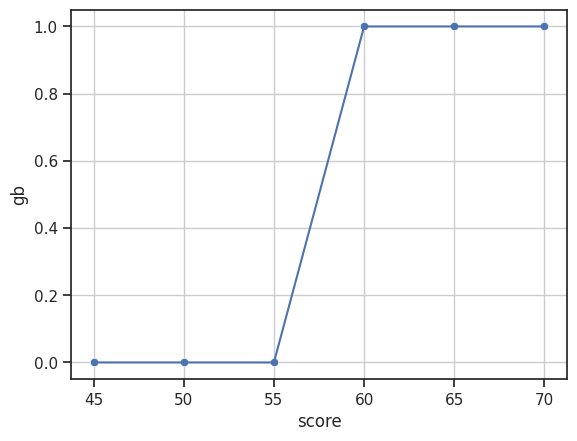

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#이진분류 예시
# Score
X_train = [45, 50, 55, 60, 65, 70]
# 합/불 여부 (합격: 1 ,불합격: 0)
y_train = [0, 0 ,0, 1, 1, 1]

sns.set(style="ticks")
sns.lineplot(x= X_train, y = y_train)
sns.scatterplot(x=X_train, y=y_train)
plt.xlabel("score")
plt.ylabel("gb")
plt.grid() 
plt.show()

위와 같이 표현된 점수는 기존에 사용하는 직선의 형태가 아닌 S자의 형태를 띈다.
\
\
따라서 $H(x) = Wx + b$가 아닌 $f$라는 새로운 함수를 도입하여, $H(x) = f(Wx + b)$를 가설에 이용한다.
#### * 시그모이드 함수(Sigmoid function)
위와 같은 S자 형태의 그래프를 그려주는 시그모이드 함수는 
$$ sigmoid(x) = \sigma(x) =  \frac{1}{1+e^{-x}} $$
정의 된다. 따라서 새로운 가설함수는 다음과 같이 정의된다.
$$ H(x) = sigmoid(Wx+b) = \sigma(Wx+b) = \frac{1}{1+e^{-(Wx+b)}} $$
선형회귀와 마찬가지로 $W$와 $b$가 함수의 그래프에 어떤 영향을 미치는지 직접 확인해보자.

In [9]:
%matplotlib inline
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립사용

In [10]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

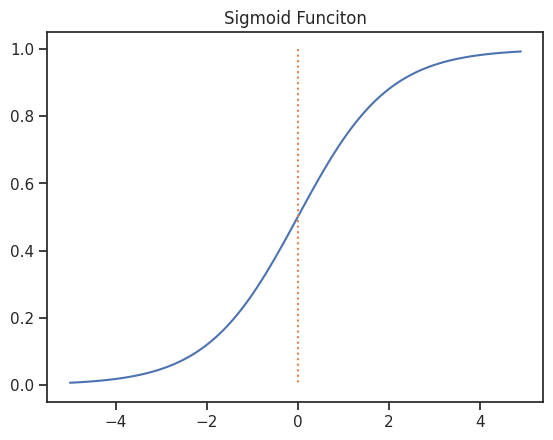

In [11]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)

sns.lineplot(x= x, y = y)
plt.plot([0,0],[1.0,0.0], ':') 
plt.title('Sigmoid Funciton')
plt.show()


만약 $W$의 값이 변화되면 그래프가 어떻게 바뀔까? 

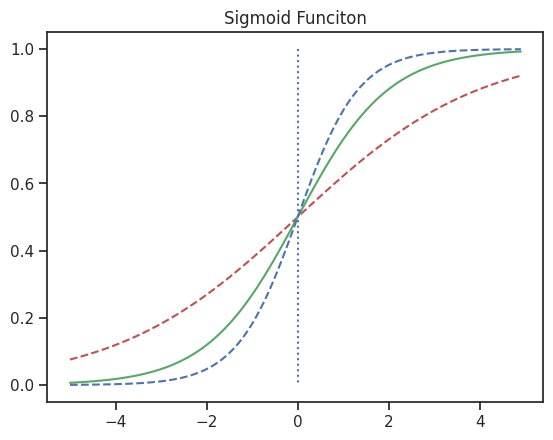

In [12]:
x = np.arange(-5, 5, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(1.5*x)


sns.lineplot(x= x, y = y1, color = 'r',linestyle='--')
sns.lineplot(x= x, y = y2, color = 'g')
sns.lineplot(x= x, y = y3, color = 'b', linestyle='--')
plt.plot([0,0],[1.0,0.0], ':') 
plt.title('Sigmoid Funciton')
plt.show()

$W$의 변화에 따라, 그래프의 기울기가 변하는 것을 확인할 수 있다. 

다음은 $b$의 변화에 따른 그래프 형태다.

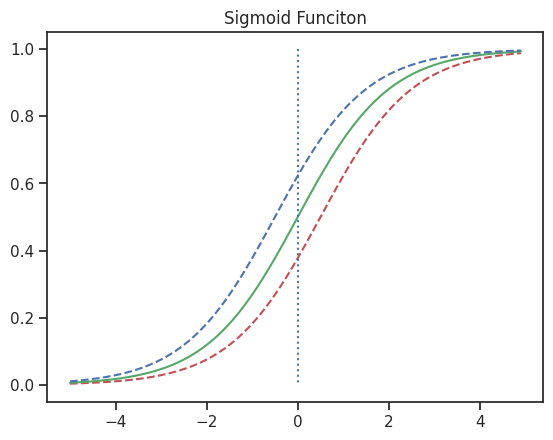

In [13]:
x = np.arange(-5, 5, 0.1)
y1 = sigmoid(x - 0.5)
y2 = sigmoid(x)
y3 = sigmoid(x + 0.5)


sns.lineplot(x= x, y = y1, color = 'r',linestyle='--')
sns.lineplot(x= x, y = y2, color = 'g')
sns.lineplot(x= x, y = y3, color = 'b', linestyle='--')
plt.plot([0,0],[1.0,0.0], ':') 
plt.title('Sigmoid Funciton')
plt.show()

$b$의 변화는 그래프의 좌, 우 이동을 보여준다. 시그모이드 함수는 값이 커질 수록 1에 수렴하고, 값이 작아질 수록 0에 수렴하는 것으로 보아 출력값은 (0,1)의 값을 갖는 특성을 가지고 있다. 따라서 임계값을 0.5로 설정했을 때, 0.5 이상이면 1, 미만이면 0으로 분류한다면 이진 분류가 될 수 있다.

#### * 비용 함수(Cost function)
로지스틱 회귀의 가설을 $H(x) = sigmoid(Wx+b)$로 수정하였다. 그렇다면 최적의 $W$와 $b$를 찾는 cost function이 필요하다. 동일한 MSE를 정의하되, $H(x)$식이 바뀌는 것을 알아야한다. $$cost(W,b) = \frac{1}{n}\sum_{i=1}^{n}\bigg[y^{(i)} - H(x^{(i)})\bigg]^{2}$$ 문제는 지금 cost함수를 미분하였을 때 발생한다. \
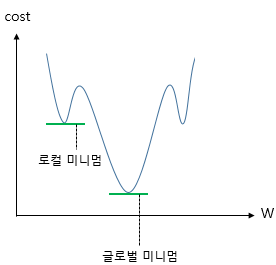\
그림과 같이 경사 하강법을 사용할 경우, global minimum이 아닌 local minimum에 갇혀 완전한 최소값에 도달하지 못 할 수 있다. global 최소값에 도달하지 못하는 $W$와 $b$를 구하는 것은 의미가 없으므로, log함수를 이용하여 적용한다.


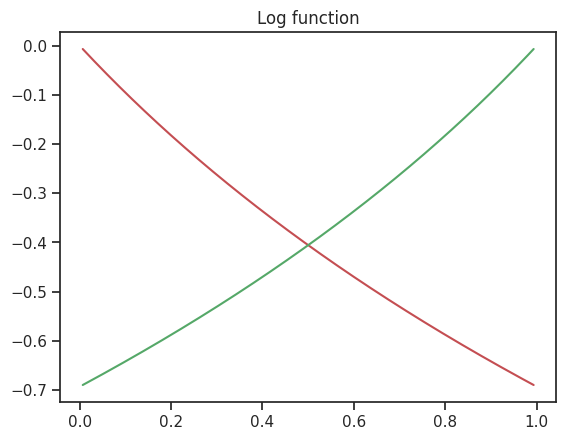

In [29]:
x = np.arange(-5, 5, 0.001)
sig_x = sigmoid(x)
y1 = -np.log1p(sig_x)
y2 = -np.log1p(1-sig_x)

sns.lineplot(x= sig_x, y = y1, color = 'r')
sns.lineplot(x= sig_x, y = y2, color = 'g')
plt.title('Log function')
plt.show()

$y$의 값이 1일 때 cost함수를 $-logH(x)$를 사용하고, $y$가 0일 때, $-log(1-H(x))$를 사용하여 새로운 cost 함수를 정의한다.
$$ cost(H(x), y) = -[ylogH(x) + (1-y)log(1-H(x))]$$
마지막으로 모든 오차의 평균을 구해 평균 제곱 오차(MSE)를 계산하면 
$$ cost(H(x), y) = -\frac{1}{n}\sum_{i=1}^{n}[y^{(i)}logH(x^{(i)}) + (1-y^{(i)})log(1-H(x^{(i)}))]$$
가 된다. 위에 cost function의 특징은 실제 $y$과 예측값 $H(x)$가 커지면 cost가 증가하고, 차이가 적으면 cost가 감소함을 확인할 수 있다. 위 비용 함수에 대해서 경사 하강법을 이용하면 $W$의 최적값을 계산할 수 있다.
$$ W:= W-\alpha \frac{\partial}{\partial W} cost(W) $$

#### * 파이토치로 로지스틱 회귀 구현

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

torch.manual_seed(1)

In [32]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
X_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [33]:
print(X_train.size())
print(y_train.size())

torch.Size([6, 2])
torch.Size([6, 1])


In [34]:
#we need transforms 6x2 matrix to 6x1 matrix
W = torch.zeros((2,1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

In [36]:
def sigmoid_torch(x):
    return 1/(1+torch.exp(-(x.matmul(W)+b)))

In [37]:
print(sigmoid_torch(X_train))

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [62]:
# define MSE of H(X)
def cost_ft(label, pred):
    return -(label*torch.log(pred) + (1 - label)*torch.log(1-pred)).mean()

In [63]:
cost_ft(y_train, sigmoid_torch(X_train))

tensor(0.6931, grad_fn=<NegBackward0>)

In [64]:
# Using API
F.binary_cross_entropy(sigmoid_torch(X_train), y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

In [65]:
# full_code

torch.manual_seed(1)

W = torch.zeros((2,1), requires_grad = True)
b = torch.zeros((1), requires_grad = True)

optimizer = optim.SGD([W,b], lr = 1)

epochs = 1000
for epoch in range(epochs +1):
    hx = sigmoid_torch(X_train)
    cost = cost_ft(y_train, hx)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}/{epochs}, cost: {round(cost.item(),6)}')

Epoch: 0/1000, cost: 0.693147
Epoch: 100/1000, cost: 0.134722
Epoch: 200/1000, cost: 0.080643
Epoch: 300/1000, cost: 0.0579
Epoch: 400/1000, cost: 0.0453
Epoch: 500/1000, cost: 0.037261
Epoch: 600/1000, cost: 0.031673
Epoch: 700/1000, cost: 0.027556
Epoch: 800/1000, cost: 0.024394
Epoch: 900/1000, cost: 0.021888
Epoch: 1000/1000, cost: 0.019852


In [71]:
X_train.matmul(W) + b

tensor([[-8.1931],
        [-3.4222],
        [-3.2050],
        [ 3.0838],
        [ 6.3368],
        [ 8.0718]], grad_fn=<AddBackward0>)

In [72]:
sigmoid_torch(X_train)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<MulBackward0>)

훈련 결과는 예측했던 것 처럼 0,0,0,1,1,1이 나온다.

In [77]:
pred = (sigmoid_torch(X_train) >= torch.FloatTensor([0.5])).to(torch.int)
print(pred)

tensor([[0],
        [0],
        [0],
        [1],
        [1],
        [1]], dtype=torch.int32)


In [74]:
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)
